# Train with video

In [47]:
import torch
torch.cuda.set_device(7)

In [91]:
from experiment.experiment import Experiment
from experiment.spatial_utils import preprocessTarget, PerceptualLoss, SpatialMapsGenerator, BatchGenerator
from models import spatial
from models.skip import skip
from utils.common_utils import generateSyntheticTexture, generateSyntheticData
import torch
dtype = torch.cuda.FloatTensor
from IPython.core.display import display, HTML
from models.decoder import decoder
from experiment.spatial_utils import SpatialVectorGenerator

config = {
    "PLOT": True,
    "optimizer": "adam",
    "lr": 1e-3,
    "num_iter": 2000,
    "show_every": 100,
    "maps_number": 4,
    "pic_code_size": 300,
    "time_code_size": 4,
    "output_size": 128,
    "video_length": 64,
    "batch_size": 4
}

config["input_size"] = config["pic_code_size"] + config["time_code_size"]


config['net_params'] = "default"

net = decoder(input_size=config['input_size'], num_channels_up=[16, 16, 16, 16, 16])
net = net.cuda()

video = generateSyntheticTexture()
target = preprocessTarget(video, config["video_length"], config["output_size"])
loss = PerceptualLoss()
spatial_maps_generator = SpatialVectorGenerator(config['time_code_size'], config['pic_code_size'])
batch_generator = BatchGenerator(target, spatial_maps_generator, config[
                                 "input_size"], config["input_size"], config["batch_size"])

parameters = list(net.parameters())
for var in spatial_maps_generator.variables_.values():
    parameters.append(var)

train_with_video = Experiment(config, parameters, batch_generator, net, loss)

Starting optimization with ADAM


/home/aafilatov/Images2Life/experiment/experiment.py:30: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  (i, total_loss.data[0]), '\r', end='')


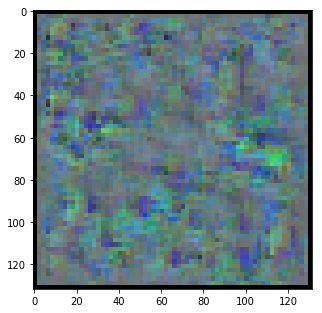

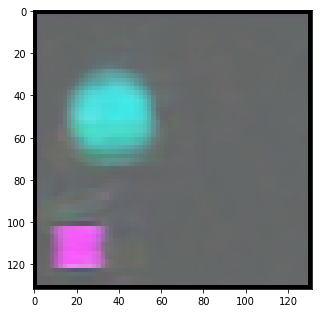

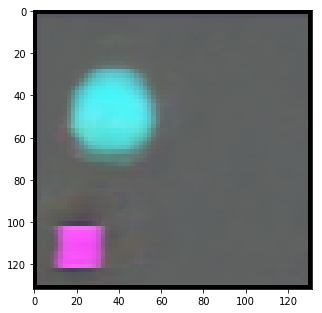

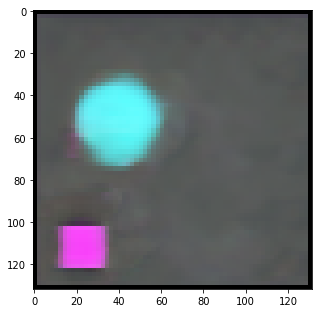

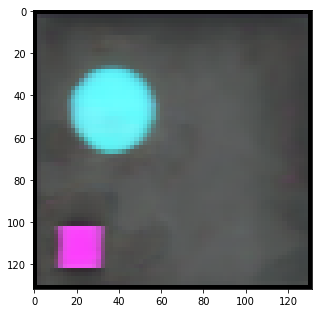

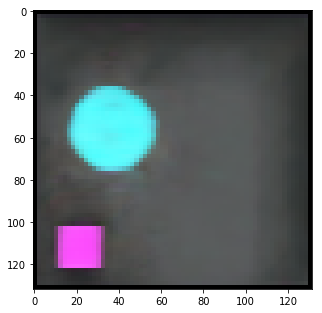

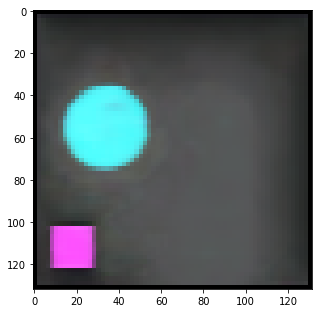

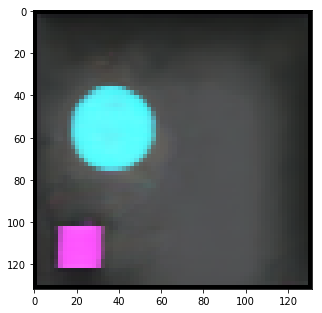

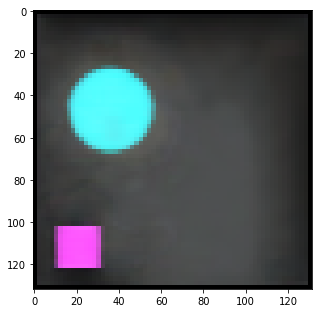

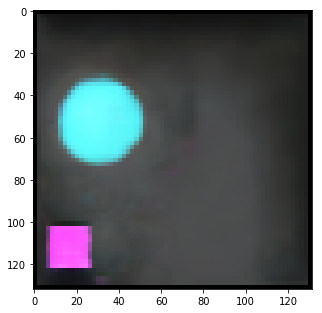

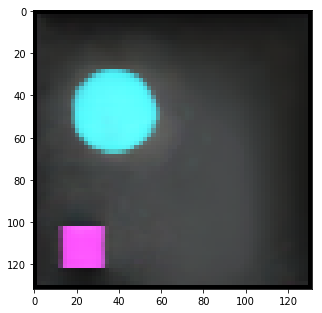

KeyboardInterrupt: 

In [93]:
train_with_video.run()

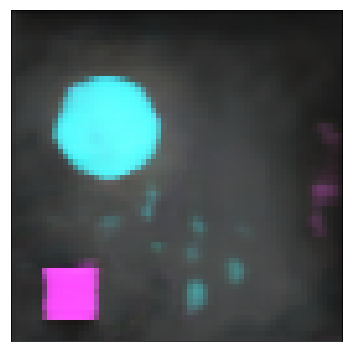

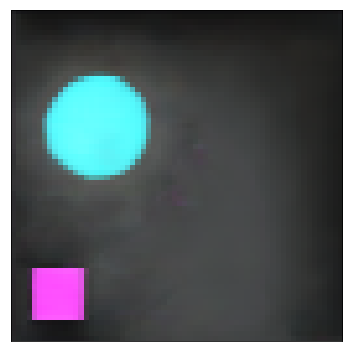

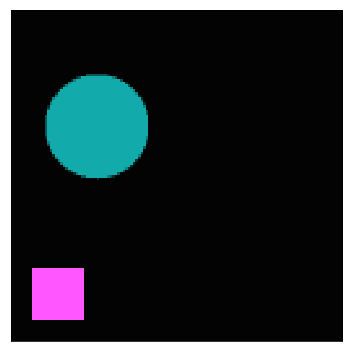

In [94]:
train_with_video.save_result();

In [95]:
from IPython.core.display import display, HTML
display(HTML(''' <video width="320" height="240" controls loop>
  <source src='{}' type="video/mp4">
</video>
<video width="320" height="240" controls loop>
  <source src='{}' type="video/mp4">
</video>
<video width="320" height="240" controls loop>
  <source src='{}' type="video/mp4">
</video> '''.format(train_with_video.path_ +"/fit.mp4",
                    train_with_video.path_ +"/predict.mp4",
                    train_with_video.path_ +"/target.mp4")))

In [96]:
torch.save(net.state_dict(), train_with_video.path_ + '/net_state.dict')
for key in spatial_maps_generator.variables_:
    torch.save(spatial_maps_generator.variables_[key], train_with_video.path_ + '/{}.dict'.format(key))

# Continue training with picture

In [118]:
net.load_state_dict(torch.load(train_with_video.path_ + '/net_state.dict'))

In [119]:
from utils.common_utils import plotCircle, plotRectangle
import numpy as np

back_side = np.zeros((256, 256, 3))
image = plotCircle(back_side, vertex=(50, 100), size=40, color=(0.3, 0.5, 0.2))
image = plotRectangle(image, vertex=(200, 40), size=30, color=(0.7, 0.1, 0.1))
image = np.array([image])

config = {
    "PLOT": True,
    "optimizer": "adam",
    "lr": 1e-2,
    "num_iter": 2000,
    "show_every": 100,
    "maps_number": 4,
    "input_size": config['input_size'],
    "output_size": 128,
    "video_length": 1,
    "batch_size": 1
}

target = preprocessTarget(image, config["video_length"], config["output_size"])
batch_generator = BatchGenerator(target, spatial_maps_generator, config[
                                 "input_size"], config["input_size"], config["batch_size"])

parameters = [spatial_maps_generator.variables_['picture'], list(net.parameters())[-2]]
train_with_picture = Experiment(config, parameters, batch_generator, net, loss)

Starting optimization with ADAM


/home/aafilatov/Images2Life/experiment/experiment.py:30: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  (i, total_loss.data[0]), '\r', end='')


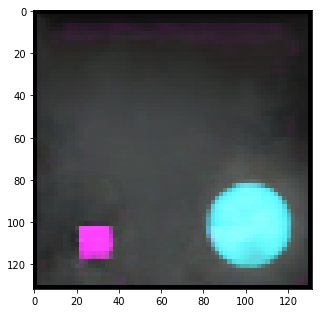

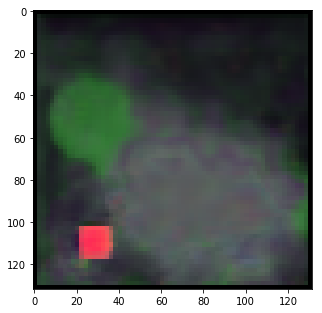

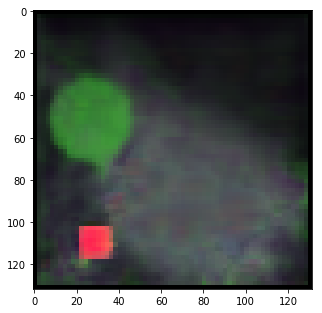

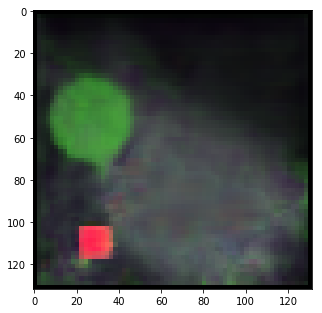

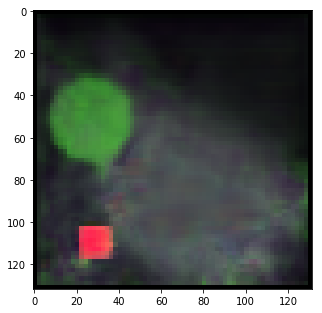

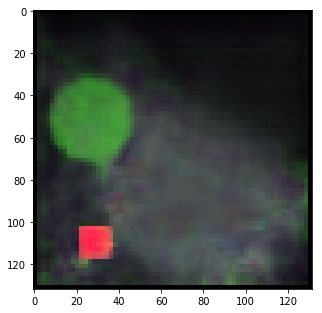

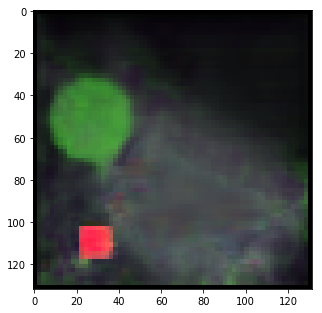

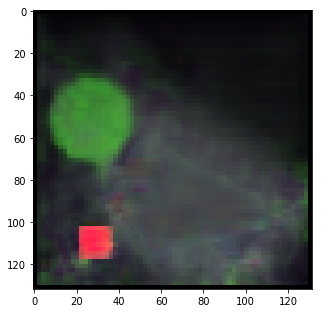

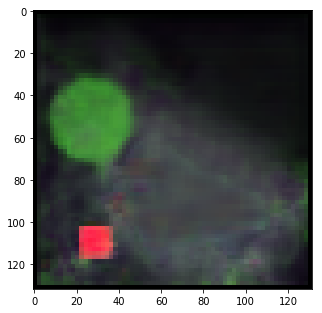

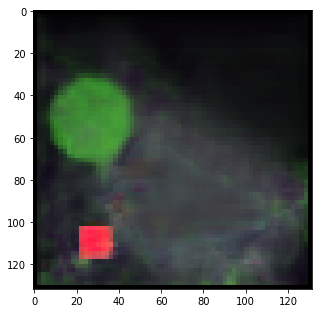

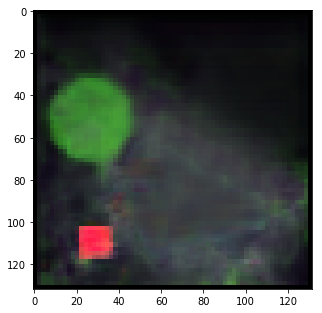

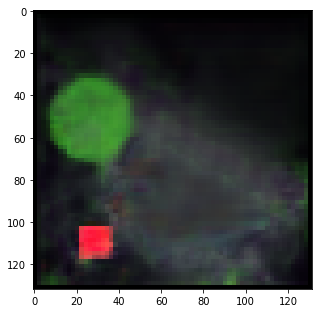

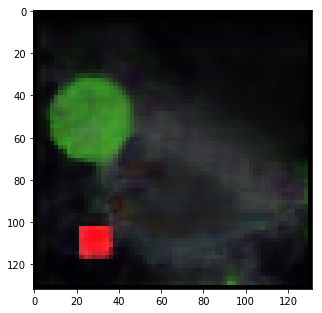

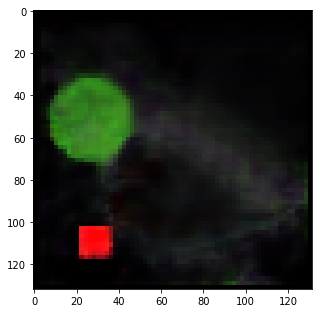

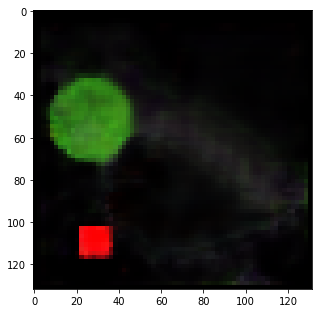

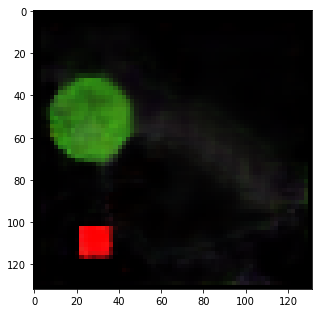

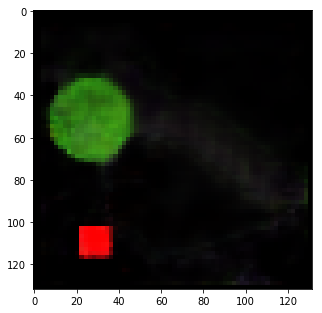

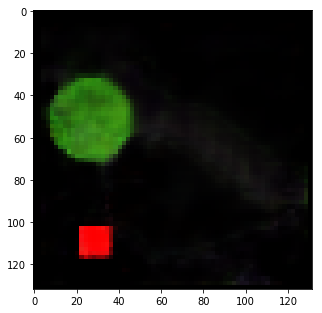

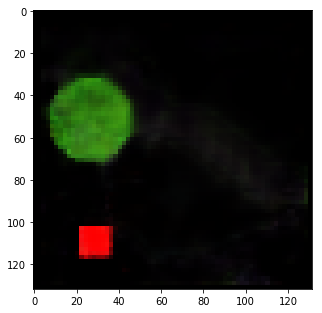

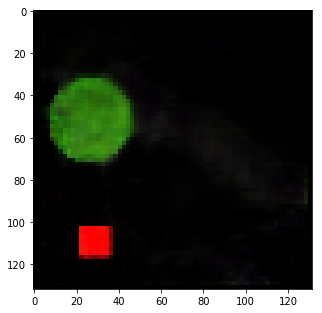

KeyboardInterrupt: 

In [120]:
train_with_picture.run()

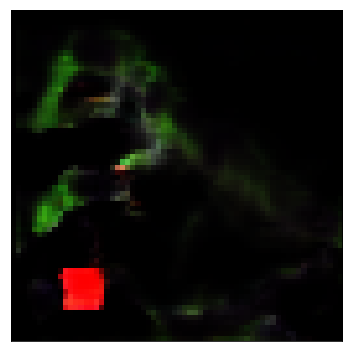

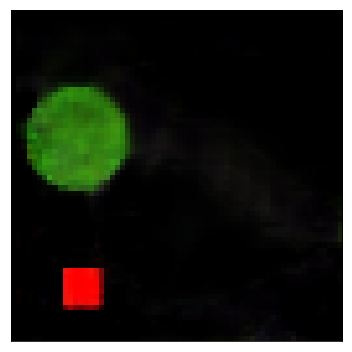

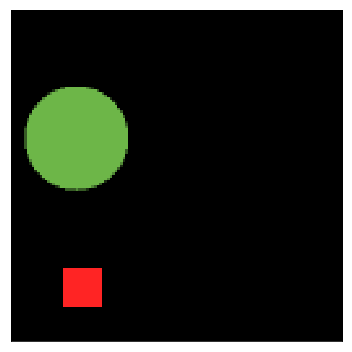

In [121]:
train_with_picture.save_result()

In [122]:
from IPython.core.display import display, HTML
display(HTML(''' <video width="320" height="240" controls loop>
  <source src='{}' type="video/mp4">
</video>
<video width="320" height="240" controls loop>
  <source src='{}' type="video/mp4">
</video>
<video width="320" height="240" controls loop>
  <source src='{}' type="video/mp4">
</video> '''.format(train_with_picture.path_ +"/fit.mp4",
                    train_with_picture.path_ +"/predict.mp4",
                    train_with_picture.path_ +"/target.mp4")))